In [1]:
# Importar la biblioteca pandas para el manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', None)

In [2]:
# Cargamos el conjunto de datos
adress = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/address.csv')
main = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/main.csv')
paid_record = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/paid_record.csv')

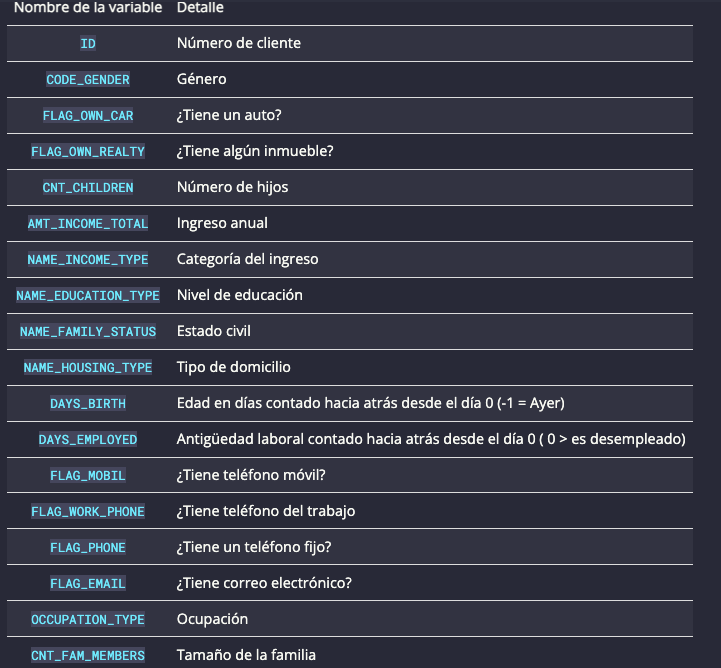

In [3]:
main

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578


- Nótese que el DataFrame paid_record contiene el historial de pagos de las tarjetas de crédito aprobadas, compuesto por el mes desde que se otorgó la tarjeta, MONTHS_BALANCE y el   estado en que se encontraba esa tarjeta a fin de mes, STATUS, además de un identificador que las vincula con sus características, ID.

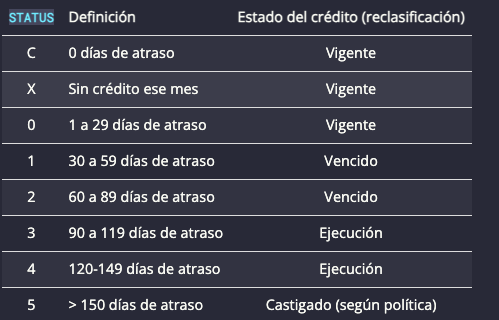

In [4]:
paid_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


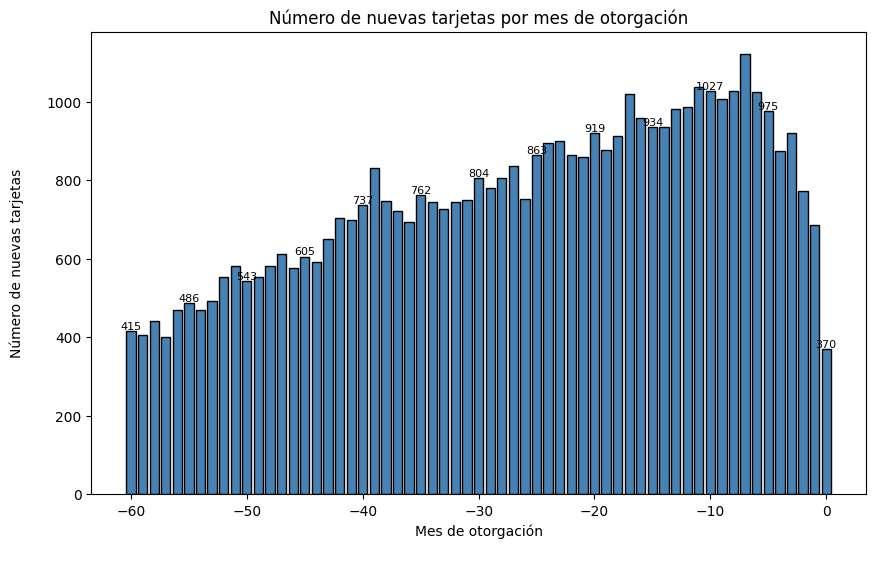

In [5]:
# Arrange data by ID and MONTHS_BALANCE
credit_record = paid_record.sort_values(by=['ID', 'MONTHS_BALANCE'])

# Keep only the distinct records for each ID
credit_record = credit_record.drop_duplicates(subset='ID', keep='first')

# Group by MONTHS_BALANCE and calculate the count
monthly_counts = credit_record.groupby('MONTHS_BALANCE').size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['MONTHS_BALANCE'], monthly_counts['Count'], color='steelblue', edgecolor='black')

# Add text labels for every 5th month
for index, row in monthly_counts.iterrows():
    if row['MONTHS_BALANCE'] % 5 == 0:
        plt.text(row['MONTHS_BALANCE'], row['Count'], str(row['Count']), ha='center', va='bottom', size=8)

# Set plot labels and title
plt.xlabel('Mes de otorgación\n')
plt.ylabel('Número de nuevas tarjetas\n')
plt.title('Número de nuevas tarjetas por mes de otorgación')

# Display the plot
plt.show()


In [6]:
main.rename(columns={'Main_ID':'ID'}, inplace=True)  

In [7]:
main

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578


In [8]:
paid_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [9]:
df = pd.merge(paid_record, main, how='inner', on='ID')
df = df[df['MONTHS_BALANCE'] == 0]
df = df.groupby('ID').first().reset_index()


In [10]:
df.head(20)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter
0,5008804,0,C,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,Medicine staff,2.0,09/04/1990,L
1,5008805,0,C,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,Sales staff,2.0,09/04/1990,G
2,5008806,0,C,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D
3,5008808,0,0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I
4,5008810,0,C,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,C
5,5008811,0,C,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-2074.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,J
6,5008813,0,0,F,N,Y,0.0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243.0,1.0,0.0,0.0,0.0,None,1.0,20/08/1961,K
7,5008815,0,0,M,Y,Y,0.0,270000.0,State servant,Higher education,Married,House / apartment,-769.0,1.0,1.0,1.0,1.0,Accountants,2.0,11/12/1976,N
8,5008821,0,X,M,N,Y,0.0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,19/06/1974,O
9,5008824,0,0,M,Y,Y,0.0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,19/06/1974,P


In [11]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   MONTHS_BALANCE       24672 non-null  int64  
 2   STATUS               24672 non-null  object 
 3   CODE_GENDER          24028 non-null  object 
 4   FLAG_OWN_CAR         24066 non-null  object 
 5   FLAG_OWN_REALTY      24067 non-null  object 
 6   CNT_CHILDREN         24063 non-null  float64
 7   AMT_INCOME_TOTAL     24084 non-null  float64
 8   NAME_INCOME_TYPE     24038 non-null  object 
 9   NAME_EDUCATION_TYPE  24049 non-null  object 
 10  NAME_FAMILY_STATUS   24054 non-null  object 
 11  NAME_HOUSING_TYPE    24058 non-null  object 
 12  DAYS_EMPLOYED        24062 non-null  float64
 13  FLAG_MOBIL           24092 non-null  float64
 14  FLAG_WORK_PHONE      24050 non-null  float64
 15  FLAG_PHONE           24033 non-null 

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter
0,5008804,0,C,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,Medicine staff,2.0,09/04/1990,L
1,5008805,0,C,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,Sales staff,2.0,09/04/1990,G
2,5008806,0,C,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D
3,5008808,0,0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I
4,5008810,0,C,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,C


In [12]:
from datetime import datetime

# Primero de todos vamos a arreglar el tipo de dato de la columna DAYS_BIRTH_CLEAN que es un object y lo vamos a pasar a datetime
main['BIRTH'] = pd.to_datetime(main['DAYS_BIRTH_CLEAN'], format='%d/%m/%Y')
main.drop(['DAYS_BIRTH_CLEAN'], axis=1, inplace=True)

In [13]:
# eliminaremos la columna OCCUPATION_TYPE ya que tiene un 31% de valores nulos
df.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)

In [14]:
df.isna().sum()/len(df)*100

ID                     0.000000
MONTHS_BALANCE         0.000000
STATUS                 0.000000
CODE_GENDER            2.610246
FLAG_OWN_CAR           2.456226
FLAG_OWN_REALTY        2.452173
CNT_CHILDREN           2.468385
AMT_INCOME_TOTAL       2.383268
NAME_INCOME_TYPE       2.569715
NAME_EDUCATION_TYPE    2.525130
NAME_FAMILY_STATUS     2.504864
NAME_HOUSING_TYPE      2.488651
DAYS_EMPLOYED          2.472438
FLAG_MOBIL             2.350843
FLAG_WORK_PHONE        2.521077
FLAG_PHONE             2.589981
FLAG_EMAIL             2.411641
CNT_FAM_MEMBERS        2.391375
DAYS_BIRTH_CLEAN       2.354896
Letter                 0.000000
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   MONTHS_BALANCE       24672 non-null  int64  
 2   STATUS               24672 non-null  object 
 3   CODE_GENDER          24028 non-null  object 
 4   FLAG_OWN_CAR         24066 non-null  object 
 5   FLAG_OWN_REALTY      24067 non-null  object 
 6   CNT_CHILDREN         24063 non-null  float64
 7   AMT_INCOME_TOTAL     24084 non-null  float64
 8   NAME_INCOME_TYPE     24038 non-null  object 
 9   NAME_EDUCATION_TYPE  24049 non-null  object 
 10  NAME_FAMILY_STATUS   24054 non-null  object 
 11  NAME_HOUSING_TYPE    24058 non-null  object 
 12  DAYS_EMPLOYED        24062 non-null  float64
 13  FLAG_MOBIL           24092 non-null  float64
 14  FLAG_WORK_PHONE      24050 non-null  float64
 15  FLAG_PHONE           24033 non-null 

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputamos Nan usando IterativeImputer
imputer = IterativeImputer(random_state=0)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [17]:
# Utilizamos el método ffill, que rellena los valores faltantes con el valor anterior, para rellenar 
# los datos faltantes y no la moda para no alterar la distribución de los datos.
object_cols = df.select_dtypes(include=object).columns
df[object_cols] = df[object_cols].fillna(method='ffill')

In [18]:
# Eliminamos los Nan restantes de la columna Birth
df.dropna(inplace=True)

In [19]:
missing_percentage = df.isna().sum() / len(df) * 100
missing_percentage

ID                     0.0
MONTHS_BALANCE         0.0
STATUS                 0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
CNT_FAM_MEMBERS        0.0
DAYS_BIRTH_CLEAN       0.0
Letter                 0.0
dtype: float64

In [20]:
df = df.astype({'ID':'int64'})

In [21]:
df.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1, inplace=True)   

In [22]:
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter
0,5008804,0.0,C,M,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,2.0,09/04/1990,L
1,5008805,0.0,C,M,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,2.0,09/04/1990,G
2,5008806,0.0,C,M,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,2.0,06/05/1964,D
3,5008808,0.0,0,F,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,26/10/1970,I
4,5008810,0.0,C,F,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,26/10/1970,C


In [23]:
# Hazme una función para pasar una columna categ´roica a numérica
def cat_to_num(df, col):
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df   

# Aplicamos la función a las columnas categóricas
cat_cols = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [24]:
# aplicamos la función cat_to_num a las columnas categóricas
for col in cat_cols:
    df = cat_to_num(df, col)

df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter
0,5008804,0.0,C,1,0.0,427500.0,4,1,0,4,-4542.0,2.0,09/04/1990,L
1,5008805,0.0,C,1,0.0,427500.0,4,1,0,4,-4542.0,2.0,09/04/1990,G
2,5008806,0.0,C,1,0.0,112500.0,4,4,1,1,-1134.0,2.0,06/05/1964,D
3,5008808,0.0,0,0,0.0,270000.0,0,4,3,1,-3051.0,1.0,26/10/1970,I
4,5008810,0.0,C,0,0.0,270000.0,0,4,3,1,-3051.0,1.0,26/10/1970,C


In [25]:
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter
0,5008804,0.0,C,1,0.0,427500.0,4,1,0,4,-4542.0,2.0,09/04/1990,L
1,5008805,0.0,C,1,0.0,427500.0,4,1,0,4,-4542.0,2.0,09/04/1990,G
2,5008806,0.0,C,1,0.0,112500.0,4,4,1,1,-1134.0,2.0,06/05/1964,D
3,5008808,0.0,0,0,0.0,270000.0,0,4,3,1,-3051.0,1.0,26/10/1970,I
4,5008810,0.0,C,0,0.0,270000.0,0,4,3,1,-3051.0,1.0,26/10/1970,C


In [26]:
# Vamos a substituir la varible DAYS_EMPLOYED por una nueva variable que indique si tiene empleo o no que nos sea de mayor utilidad
tiene_empleo = lambda x: 1 if x < 0 else 0
df['Empleo'] = df.DAYS_EMPLOYED.apply(tiene_empleo)
df.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

In [27]:
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Empleo
0,5008804,0.0,C,1,0.0,427500.0,4,1,0,4,2.0,09/04/1990,L,1
1,5008805,0.0,C,1,0.0,427500.0,4,1,0,4,2.0,09/04/1990,G,1
2,5008806,0.0,C,1,0.0,112500.0,4,4,1,1,2.0,06/05/1964,D,1
3,5008808,0.0,0,0,0.0,270000.0,0,4,3,1,1.0,26/10/1970,I,1
4,5008810,0.0,C,0,0.0,270000.0,0,4,3,1,1.0,26/10/1970,C,1


In [28]:
from datetime import datetime

# Primero de todos vamos a arreglar el tipo de dato de la columna DAYS_BIRTH_CLEAN que es un object y lo vamos a pasar a datetime
df['BIRTH'] = pd.to_datetime(df['DAYS_BIRTH_CLEAN'], format='%d/%m/%Y')
df.drop(['DAYS_BIRTH_CLEAN'], axis=1, inplace=True)

In [29]:
df.dtypes

ID                              int64
MONTHS_BALANCE                float64
STATUS                         object
CODE_GENDER                     int64
CNT_CHILDREN                  float64
AMT_INCOME_TOTAL              float64
NAME_INCOME_TYPE                int64
NAME_EDUCATION_TYPE             int64
NAME_FAMILY_STATUS              int64
NAME_HOUSING_TYPE               int64
CNT_FAM_MEMBERS               float64
Letter                         object
Empleo                          int64
BIRTH                  datetime64[ns]
dtype: object

In [30]:
df.to_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/data_cleaned.csv')

Como se comento al inicio, nuestro objetivo es clasificar a los clientes en buenos o malos para asi decidir si otorgar o no el crédito, con esto en mente vamos a ocupar algoritmos de clasificación y vamos a necesitar nuestra variable target (buen cliente o mal cliente)

Como tal, los datos no nos proporcionan este variable target, por lo que vamos a crearla con base a la columna STATUS de nuestro dataset, vamos a catalogar como buenos clientes (con el número 1) a las personas que tengan este status (C, X, 0) ya que son personas que no tienen un prestamo, lo han pagado por completo este mes o tienen un mes de vencido. El resto de status (1-5) seran catalogados como malos clientes (con número 0) ya que tienen algun atraso mayor a 30 dias en sus prestamos.

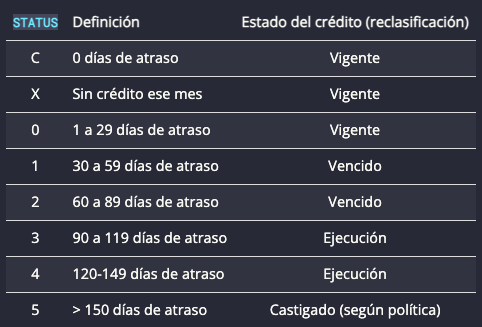

In [31]:
# Vamos a renombrar la variable STATUS como target y vamos a reorganizar su contenido
target = lambda x: 1 if x in ('C', 'X', '0') else 0
df['Target'] = df['STATUS'].apply(target)
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,Letter,Empleo,BIRTH,Target
0,5008804,0.0,C,1,0.000000,427500.0,4,1,0,4,2.0,L,1,1990-04-09,1
1,5008805,0.0,C,1,0.000000,427500.0,4,1,0,4,2.0,G,1,1990-04-09,1
2,5008806,0.0,C,1,0.000000,112500.0,4,4,1,1,2.0,D,1,1964-05-06,1
3,5008808,0.0,0,0,0.000000,270000.0,0,4,3,1,1.0,I,1,1970-10-26,1
4,5008810,0.0,C,0,0.000000,270000.0,0,4,3,1,1.0,C,1,1970-10-26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24667,5150481,0.0,X,0,1.000000,157500.0,4,4,1,5,3.0,K,1,1993-07-19,1
24668,5150483,0.0,X,0,1.000000,157500.0,4,4,1,1,3.0,D,1,1993-07-19,1
24669,5150484,0.0,C,0,1.034121,157500.0,4,4,1,1,3.0,B,1,1993-07-19,1
24670,5150485,0.0,0,0,1.000000,157500.0,4,4,1,1,3.0,W,1,1993-07-19,1


In [32]:
df.Target.value_counts()

1    24347
0      325
Name: Target, dtype: int64

In [33]:
df.drop(['STATUS','MONTHS_BALANCE','Letter','CNT_CHILDREN'], axis=1, inplace=True)   

In [34]:
df['Edad'] = (2023-df['BIRTH'].dt.year)

In [35]:
df.drop(['ID','BIRTH','CNT_FAM_MEMBERS'], axis=1, inplace=True)

In [36]:
df = df.assign(Target=df.pop('Target'))
df.head()

,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Empleo,Edad,Target
0,1,427500.0,4,1,0,4,1,33,1
1,1,427500.0,4,1,0,4,1,33,1
2,1,112500.0,4,4,1,1,1,59,1
3,0,270000.0,0,4,3,1,1,53,1
4,0,270000.0,0,4,3,1,1,53,1


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,24672.0,0.335319,0.472112,0.0,0.0,0.0,1.0,1.0
AMT_INCOME_TOTAL,24672.0,186989.176328,100678.625305,27000.0,121500.0,162000.0,225000.0,1575000.0
NAME_INCOME_TYPE,24672.0,2.389794,1.739656,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,24672.0,3.097884,1.340867,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,24672.0,1.372892,0.954678,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,24672.0,1.283114,0.951404,0.0,1.0,1.0,1.0,5.0
Empleo,24672.0,0.812743,0.390125,0.0,1.0,1.0,1.0,1.0
Edad,24672.0,44.232207,11.448940,21.0,35.0,43.0,54.0,69.0
Target,24672.0,0.986827,0.114017,0.0,1.0,1.0,1.0,1.0


/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_13229/1246658364.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_13229/1246658364.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var

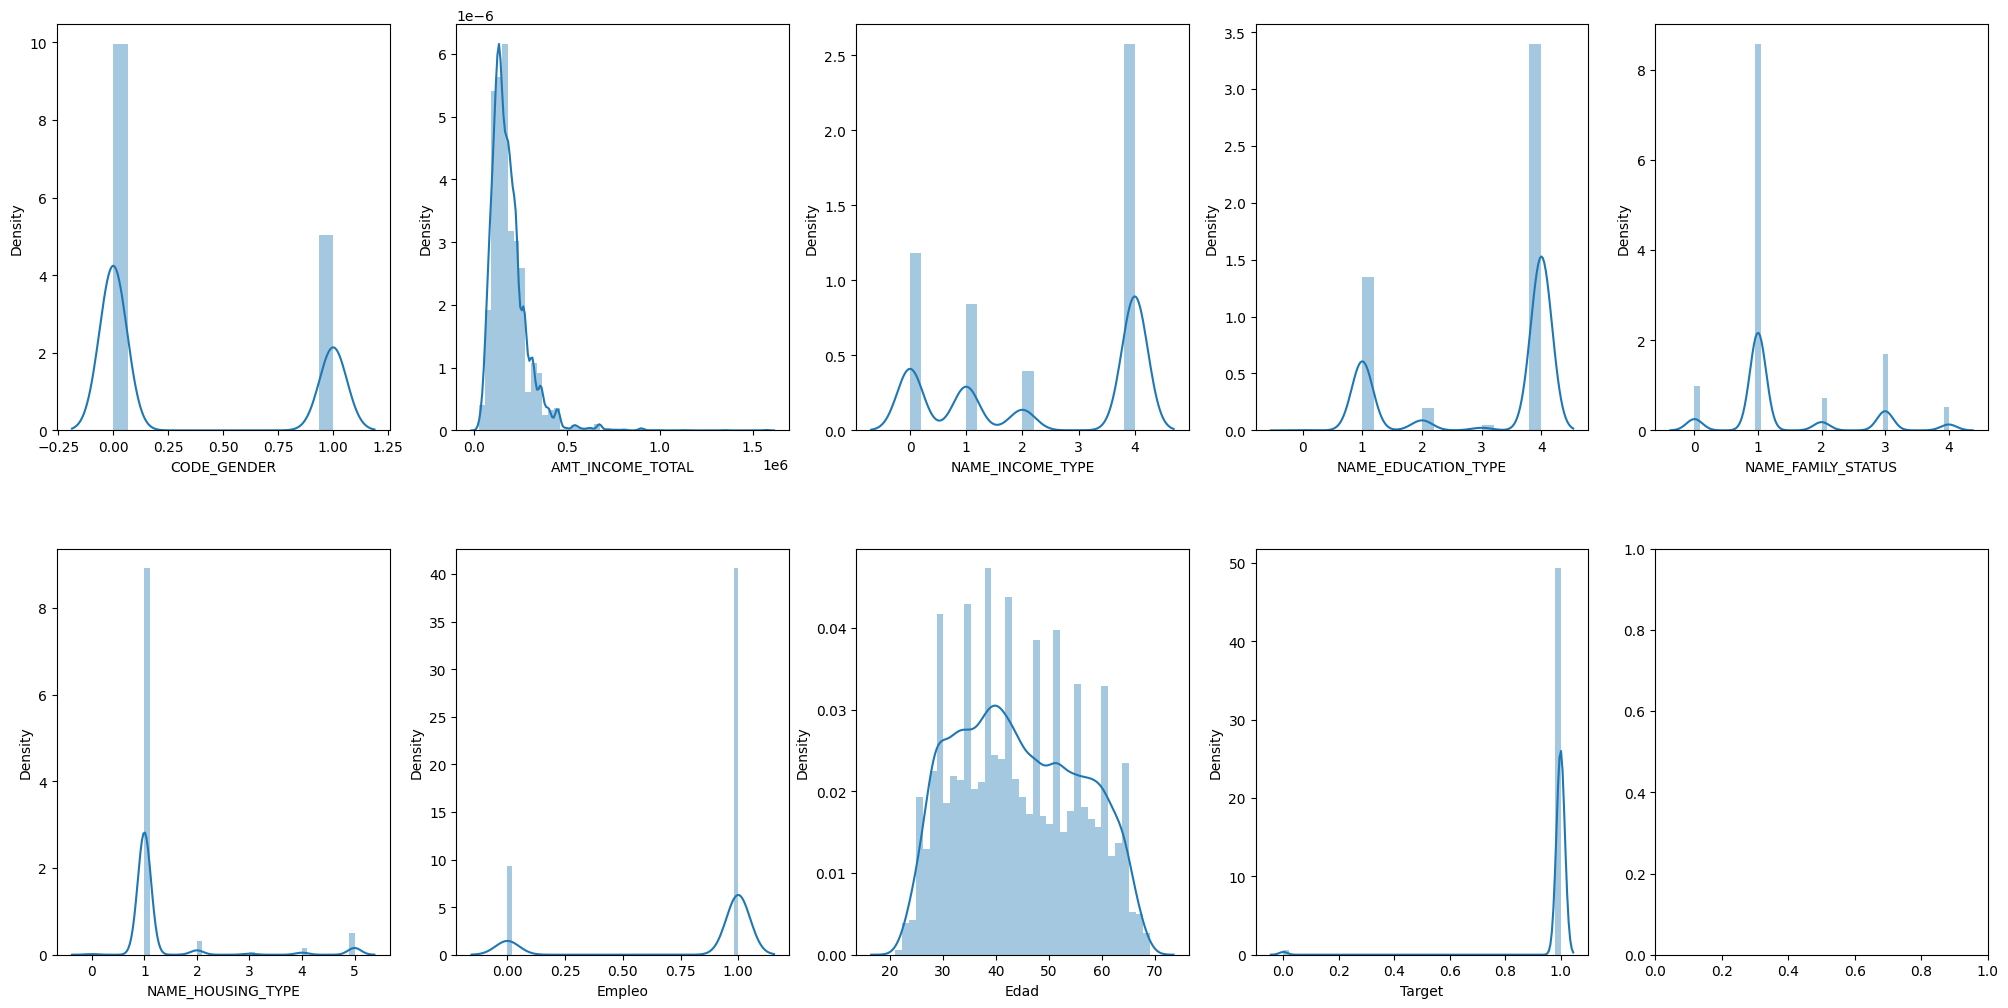

In [38]:
# Histogramas

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

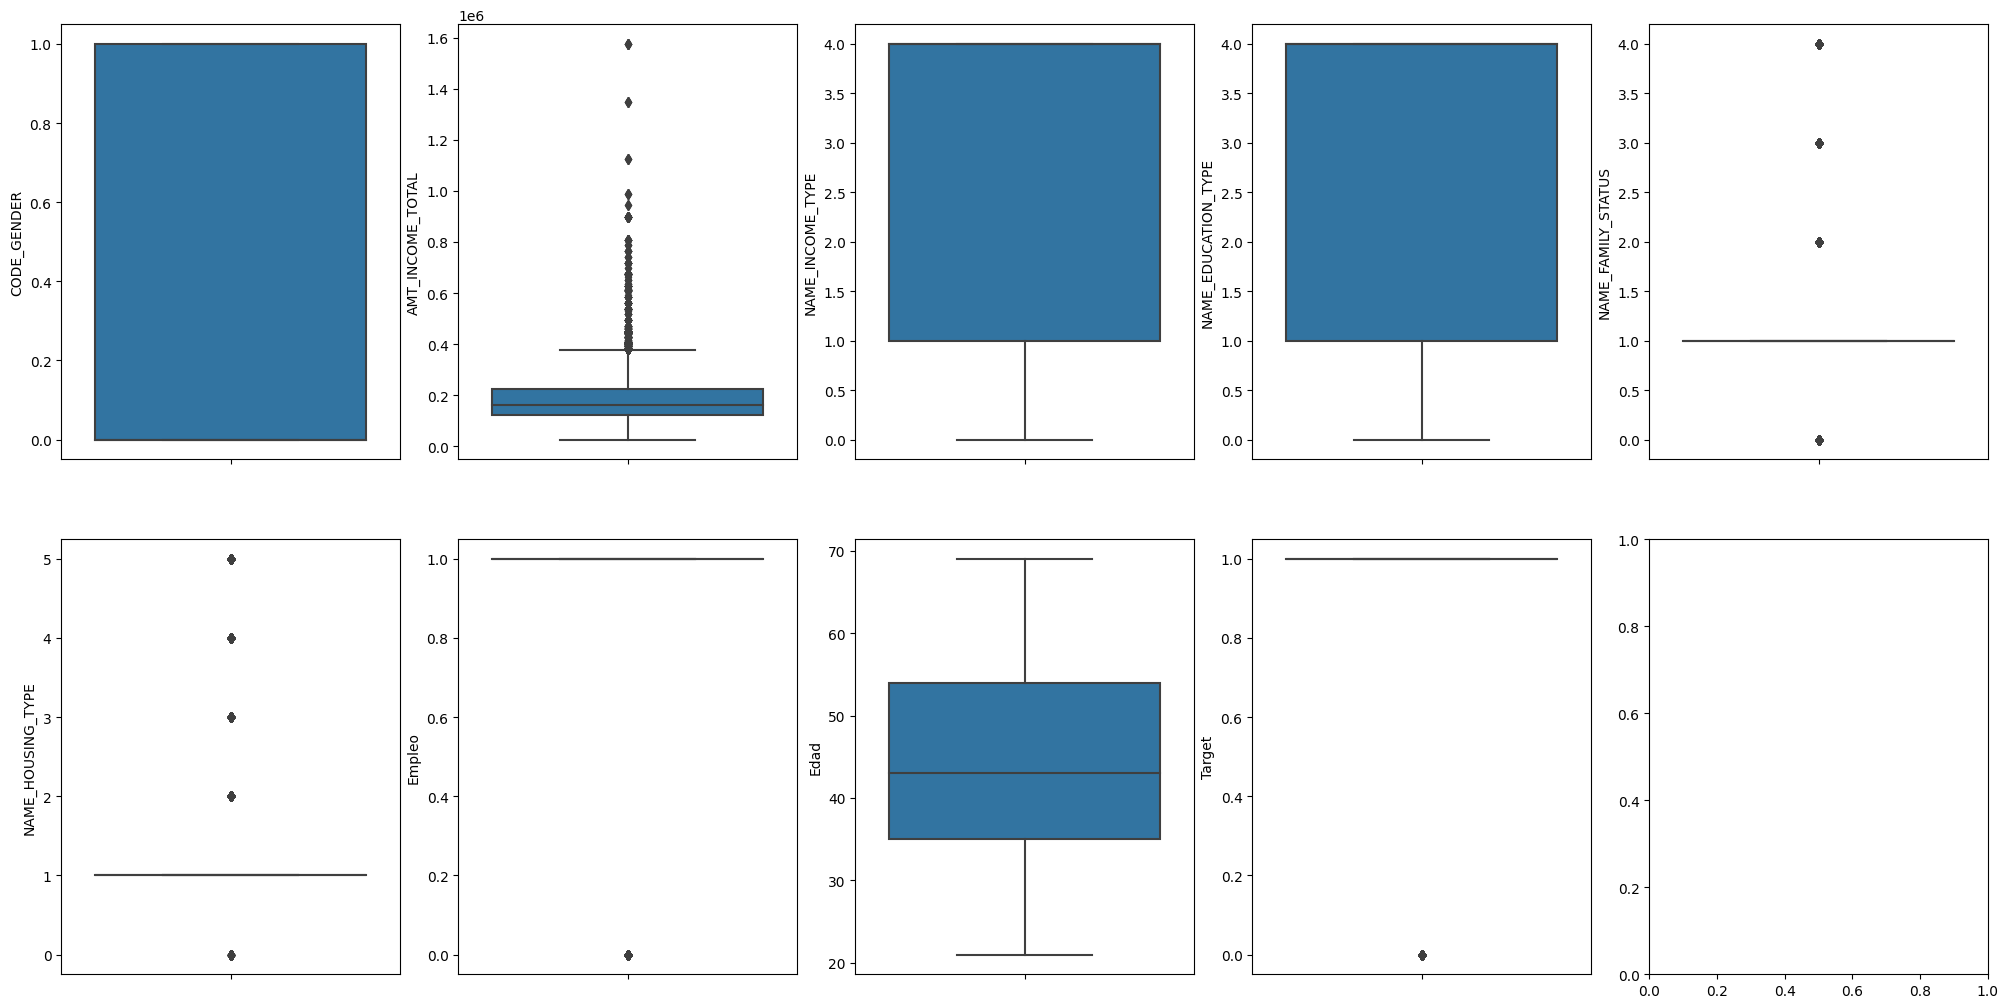

In [39]:
# Verificación de outliers
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,24672.0,0.335319,0.472112,0.0,0.0,0.0,1.0,1.0
AMT_INCOME_TOTAL,24672.0,186989.176328,100678.625305,27000.0,121500.0,162000.0,225000.0,1575000.0
NAME_INCOME_TYPE,24672.0,2.389794,1.739656,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,24672.0,3.097884,1.340867,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,24672.0,1.372892,0.954678,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,24672.0,1.283114,0.951404,0.0,1.0,1.0,1.0,5.0
Empleo,24672.0,0.812743,0.390125,0.0,1.0,1.0,1.0,1.0
Edad,24672.0,44.232207,11.448940,21.0,35.0,43.0,54.0,69.0
Target,24672.0,0.986827,0.114017,0.0,1.0,1.0,1.0,1.0


In [41]:
# Vamos cambiar el valor de los outliers dentro de un rango de 1.5 veces el rango intercuartílico específicamente a la 'AMT_INCOME_TOTAL'umna AMT_INCOME_TOTAL

Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3-Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)
df.loc[df['AMT_INCOME_TOTAL'] < lower_range, 'AMT_INCOME_TOTAL'] = lower_range
df.loc[df['AMT_INCOME_TOTAL'] > upper_range, 'AMT_INCOME_TOTAL'] = upper_range  

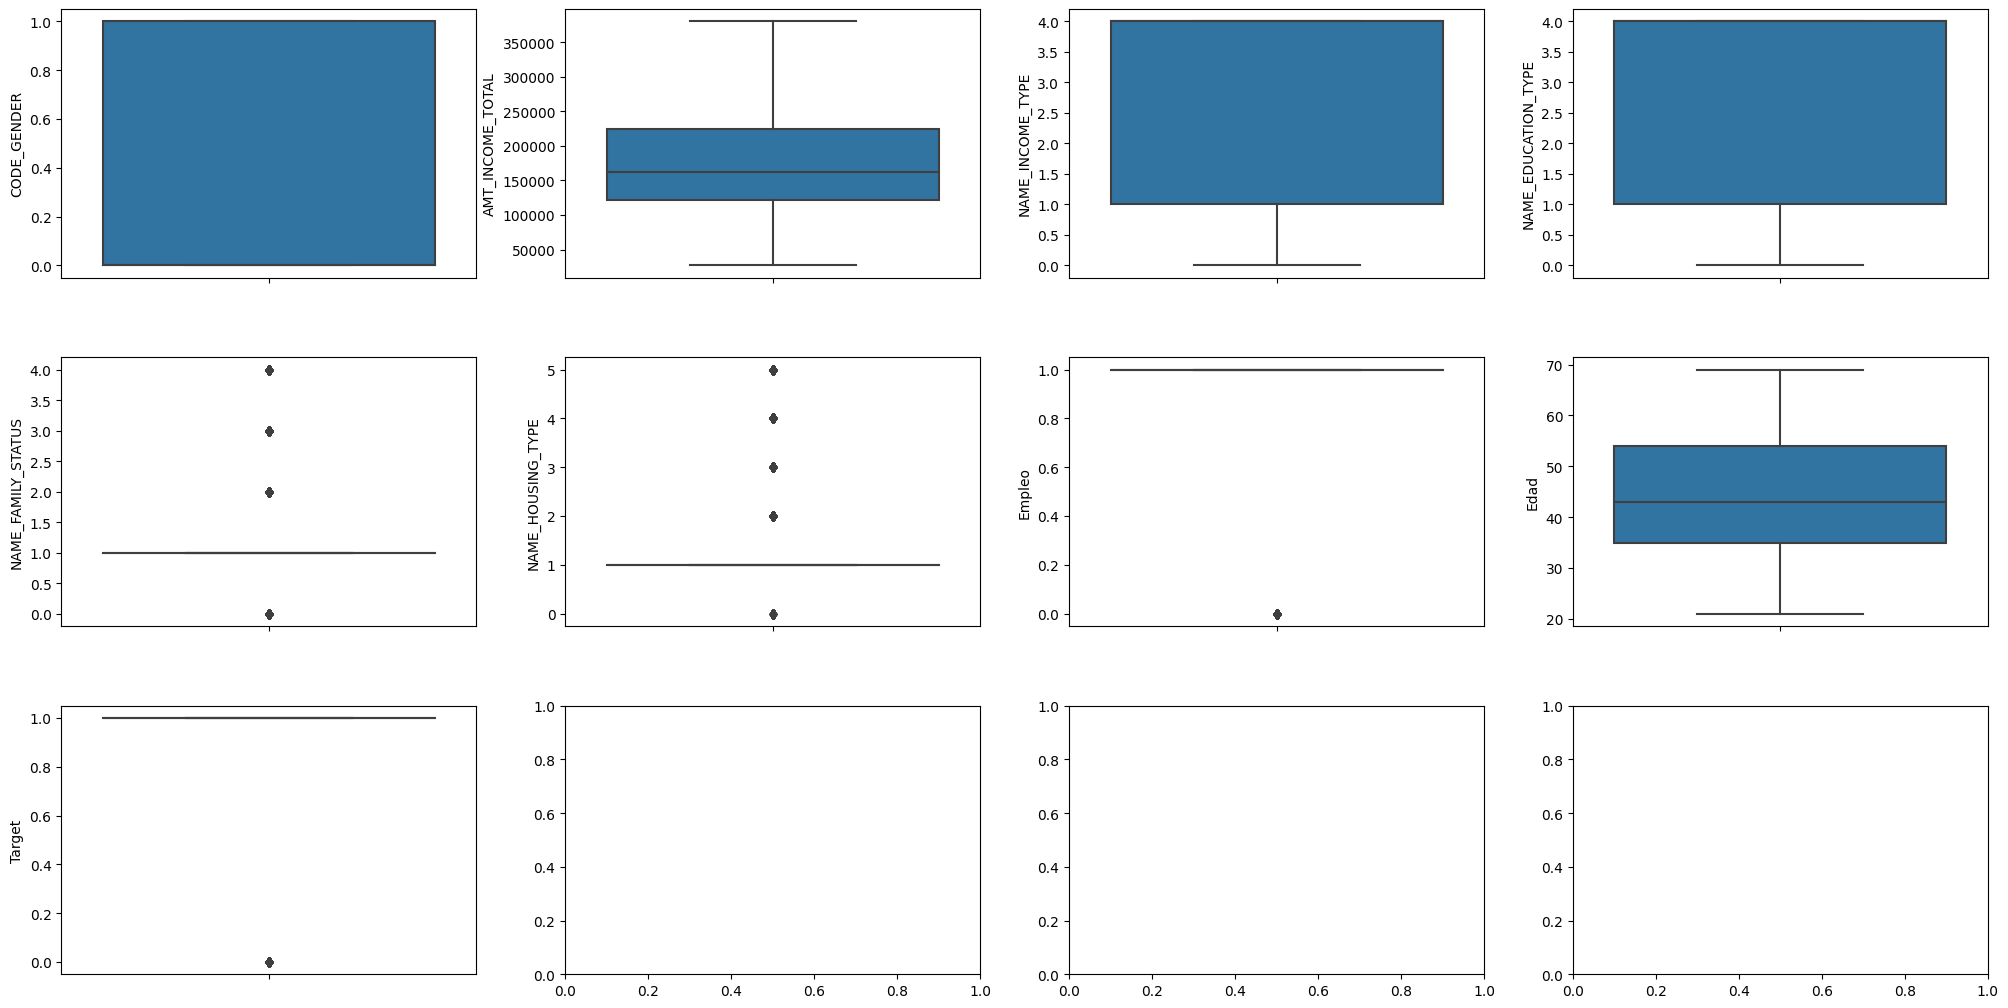

In [42]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

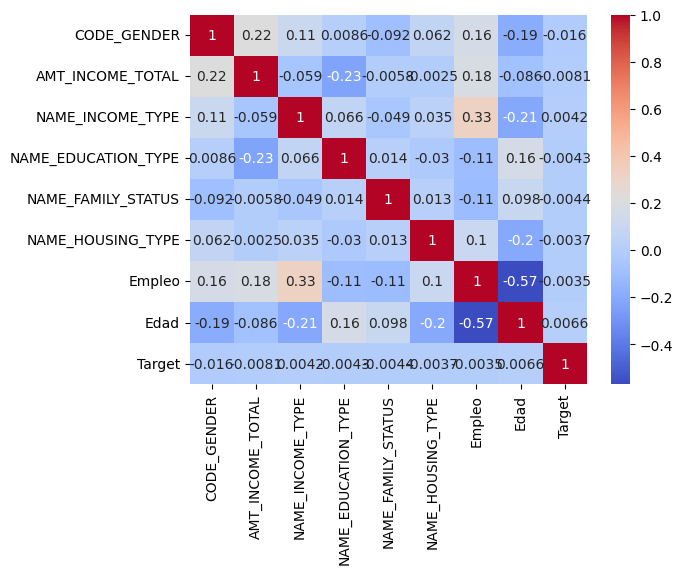

In [43]:
# Veamos la releación entre las variables
correaltion = df.corr()
sns.heatmap(correaltion, annot=True, cmap='coolwarm')

##### La proporción de clientes 'buenos' y 'malos' de nuestra variable target está muy desproporcionada y tendrá poca información de los clientes 'malos'

In [44]:
df['Target'].value_counts()/len(df)*100

1    98.682717
0     1.317283
Name: Target, dtype: float64

In [45]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(24672, 8) (19737, 8) (4935, 8)


In [47]:
# Debemos balancear los datos ya que hay un desbalanceo muy grande entre las clases
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)  

In [48]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

1    24347
0    24347
Name: Target, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(48694, 8) (38955, 8) (9739, 8)


In [50]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)


RandomForestClassifier()

In [51]:
y_train_pred = RFC.predict(X_train) #Prediccion en Train
y_test_pred = RFC.predict(X_test) #Prediccion en Test

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy_randomForest = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_randomForest)

% de aciertos sobre el set de entrenamiento: 0.9602618405852907
% de aciertos sobre el set de evaluación: 0.9403429510216654


In [54]:
import pickle
filename = 'trained_model.pkl'
pickle.dump(RFC, open(filename, 'wb'))


In [55]:
genero = int(input('Ingrese el género del cliente: 0 for Female ,1 for Male'))
income = int(input('Ingrese el ingreso mensual del cliente: '))
profesion = int(input('Ingrese la profesión del cliente: Working:4, Commercial:0,Pensioner:1, servant:2, Student:3'))
educacion = int(input('Ingrese el mayor tipo de educación que haya cursado: Secondary / secondary special :4, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 0')) 
estado_civil = int(input('Ingrese el estado civil del cliente: Married: 1, Single:3,Civil marriage:0, Separated:2, Widow:4'))
casa = int(input('Ingrese el tipo de vivienda del cliente: House / apartment:1, Rented apartment:4, With parents:5, Municipal apartment:2, Co-op apartment:0, Office apartment:3'))
empleo = int(input('Ingrese si el cliente tiene empleo: 0 for No, 1 for Yes'))
edad = int(input('Ingrese la edad del cliente: '))

input_data= pd.DataFrame([[genero,income,profesion,educacion,estado_civil,casa,empleo,edad]],columns=X.columns)

prediction = RFC.predict(input_data)
if prediction == 0: 
    print('El cliente no es un buen candidato para la tarjeta de crédito')
else:   
    print('El cliente es un buen candidato para la tarjeta de crédito')



El cliente es un buen candidato para la tarjeta de crédito
